# Feature Engineering

# 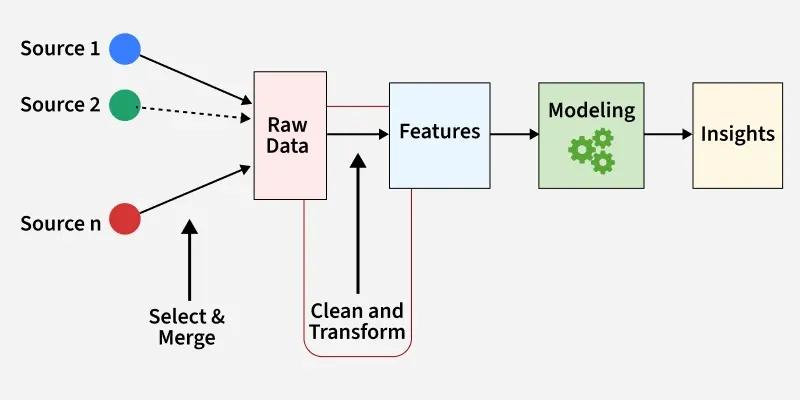

Feature engineering can significantly influence model performance. By refining features, we can:

Improve accuracy: Choosing the right features helps the model learn better, leading to more accurate predictions.<br>
Reduce overfitting: Using fewer, more important features helps the model avoid memorizing the data and perform better on new data.<br>
Boost interpretability: Well-chosen features make it easier to understand how the model makes its predictions.<br>
Enhance efficiency: Focusing on key features speeds up the model’s training and prediction process, saving time and resources.

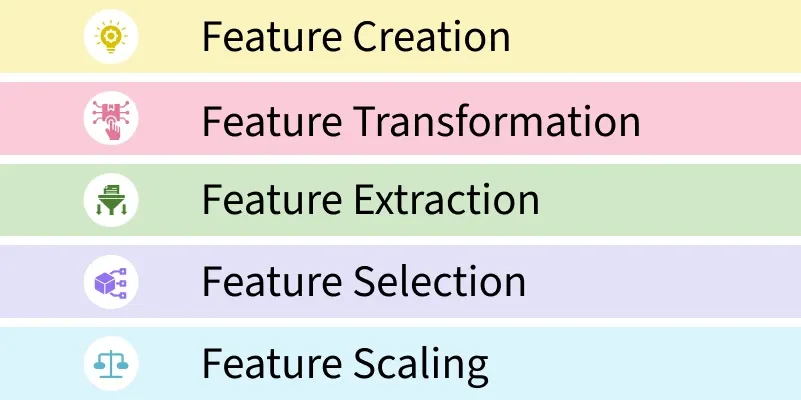


---

## **1. Feature Creation**

**Definition:** Generating new features from existing data to provide more predictive power.
This is usually based on **domain knowledge**, **intuition**, or **exploratory data analysis**.

**Why it’s done:**

* Raw data often doesn’t directly reveal relationships.
* Combining or deriving variables can capture **hidden patterns**.

**Examples:**

* From a date field → create `Year`, `Month`, `Day`, `Day_of_Week`, `Is_Weekend`.
* From `height` and `weight` → calculate `BMI`.
* Combining categorical features (e.g., "city" + "season") → "city\_season" feature.

**Risks / Considerations:**

* Can lead to **feature explosion** (too many unnecessary features).
* May introduce **multicollinearity** if highly correlated with existing variables.
* Needs **interpretability check** — more features aren’t always better.

---



---

## **Feature Transformation – Full Theory**

Feature transformation means **mathematically or statistically changing the representation of a feature** while preserving its information, to make it **more useful for the model**.

It’s mainly used to:

* Handle skewed data or outliers.
* Make relationships between features and target more linear.
* Standardize feature magnitude for algorithms sensitive to scale.
* Encode categorical data for numerical models.

---

### **1. Mathematical Transformations (Continuous Data)**

Change the numerical values to reduce skewness, handle outliers, or stabilize variance.

| Transformation                                  | Purpose                                    | Example                                            |
| ----------------------------------------------- | ------------------------------------------ | -------------------------------------------------- |
| **Log Transformation**                          | Reduces right skew, stabilizes variance    | `log(x+1)` for income values `[1000, 2000, 50000]` |
| **Square Root Transformation**                  | Similar to log but handles zeros naturally | `sqrt(x)` for transaction counts `[0, 1, 4, 9]`    |
| **Reciprocal Transformation**                   | Reduces influence of large values          | `1/x` for speed `[100, 200, 400]`                  |
| **Power Transformation (Box-Cox, Yeo-Johnson)** | Generalized variance stabilization         | `boxcox(x)` on positive data                       |
| **Polynomial Features**                         | Capture nonlinear relationships            | From `x`, create `x²`, `x³`                        |
| **Absolute Value Transformation**               | Removes negative signs                     | `abs(x)` for profit/loss data                      |

---

### **2. Scaling Transformations**

Rescale numerical values so they contribute proportionally to model training.

| Scaling Method                | Purpose                              | Example                                    |
| ----------------------------- | ------------------------------------ | ------------------------------------------ |
| **Min-Max Scaling**           | Normalizes to range \[0,1]           | For `[50, 100, 150]` → `[0, 0.5, 1]`       |
| **Standardization (Z-score)** | Mean = 0, SD = 1                     | `(x - μ) / σ`                              |
| **MaxAbs Scaling**            | Scales by max absolute value         | `[ -3, -1, 0, 2]` → `[-1, -0.33, 0, 0.66]` |
| **Robust Scaling**            | Uses median & IQR, good for outliers | `(x - median) / IQR`                       |

---

### **3. Encoding Transformations (Categorical Data)**

Convert categorical variables into numerical form.

| Encoding Method      | Purpose                                                     | Example                                          |
| -------------------- | ----------------------------------------------------------- | ------------------------------------------------ |
| **One-Hot Encoding** | Creates binary columns per category                         | `Color = Red, Blue` → `[1, 0]`                   |
| **Label Encoding**   | Assigns integer labels                                      | `Small=0, Medium=1, Large=2`                     |
| **Ordinal Encoding** | For ordered categories                                      | Education: `High School=1, College=2, Masters=3` |
| **Binary Encoding**  | Reduces dimensionality of high-cardinality categorical data | `Category 5` → binary `101`                      |
| **Target Encoding**  | Replace category with target mean                           | `City` → Avg house price for that city           |

---

### **4. Binning (Discretization)**

Convert continuous features into categorical bins.

| Binning Method              | Purpose                            | Example                                           |
| --------------------------- | ---------------------------------- | ------------------------------------------------- |
| **Equal-Width Binning**     | Divides range into equal intervals | Age `[0–10], [10–20], ...`                        |
| **Equal-Frequency Binning** | Each bin has same count            | Split 100 salaries into 4 bins with 25 each       |
| **Custom Binning**          | Domain-driven bin edges            | Income → `Low (<30k), Mid (30k-70k), High (>70k)` |

---

### **5. Normalization of Non-Numeric Data**

Transform text, time, or other formats into numeric features.

| Data Type    | Transformation          | Example                                                   |
| ------------ | ----------------------- | --------------------------------------------------------- |
| **Text**     | TF-IDF, word embeddings | `"machine learning"` → `[0.1, 0.5, ...]`                  |
| **Datetime** | Extract components      | `2025-08-16` → `Year=2025, Month=8, Day=16, Is_Weekend=0` |
| **Images**   | Pixel normalization     | Pixel values `[0-255]` → `[0-1]`                          |

---

### **6. Dimensionality Reduction Transformations**

Transform high-dimensional data into fewer variables while preserving variance.

| Method                                 | Purpose                                          | Example                                           |
| -------------------------------------- | ------------------------------------------------ | ------------------------------------------------- |
| **PCA (Principal Component Analysis)** | Uncorrelated components from correlated features | 50 pixel features → 10 principal components       |
| **t-SNE / UMAP**                       | Non-linear reduction for visualization           | 300D word embeddings → 2D plot                    |
| **LDA (Linear Discriminant Analysis)** | Supervised dimension reduction                   | Compress data while maximizing class separability |

---

### **7. Nonlinear Mapping**

Apply functions to capture complex relationships.

| Method                         | Purpose                | Example                             |
| ------------------------------ | ---------------------- | ----------------------------------- |
| **Sine/Cosine Transformation** | Encode cyclic features | Month=12 → sin/cos values           |
| **Custom Functions**           | Domain-specific        | Energy usage → log(temp) × humidity |

---




---

## **Feature Extraction – Deep Theory**

**Definition:**
Feature extraction is the process of **deriving new features from raw data** — often high-dimensional, unstructured, or noisy — to create a **compact and informative representation** for machine learning models.

Unlike **feature creation** (manual, domain-driven) or **feature transformation** (changes existing features’ scale or distribution), **feature extraction** often:

* Reduces **dimensionality**.
* Converts **unstructured data** (text, images, audio, signals) into structured numeric features.
* Focuses on **retaining the most important information** while discarding redundancy.

---

## **Why It’s Done**

* **Dimensionality Reduction:** Avoids the curse of dimensionality.
* **Noise Reduction:** Removes irrelevant variation.
* **Efficiency:** Lower computational cost.
* **Better Learning:** Highlights the most predictive information.

---

## **1. Dimensionality Reduction Methods**

Used when you have **many correlated variables** or high-dimensional continuous data.

| Method                                 | Purpose                                                                      | Example                                                            |
| -------------------------------------- | ---------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **PCA (Principal Component Analysis)** | Projects data onto fewer uncorrelated components capturing maximum variance. | 100 correlated sensor readings → 10 principal components.          |
| **LDA (Linear Discriminant Analysis)** | Supervised projection maximizing class separability.                         | Reduce 50D feature set to 2D while keeping class boundaries clear. |
| **t-SNE / UMAP**                       | Non-linear embedding for visualization or clustering.                        | Convert 300D word embeddings → 2D for plotting.                    |
| **Autoencoders**                       | Neural network learns compressed latent space.                               | Compress 784-pixel MNIST images → 32 features.                     |

---

## **2. Text Feature Extraction**

Raw text → numerical representation.

| Method                                                 | Purpose                                   | Example                                                          |
| ------------------------------------------------------ | ----------------------------------------- | ---------------------------------------------------------------- |
| **Bag of Words (BoW)**                                 | Counts term frequency per document.       | `"machine learning is fun"` → `[1,1,1,1]`                        |
| **TF-IDF (Term Frequency–Inverse Document Frequency)** | Weighs terms by importance across corpus. | Common words get lower weight.                                   |
| **Word Embeddings**                                    | Capture semantic meaning in vectors.      | Word2Vec, GloVe, FastText. `"king" - "man" + "woman" ≈ "queen"`. |
| **Contextual Embeddings**                              | Meaning changes by context.               | BERT, GPT embeddings.                                            |

---

## **3. Image Feature Extraction**

Images → compact feature representation.

| Method                    | Purpose                                       | Example                                          |
| ------------------------- | --------------------------------------------- | ------------------------------------------------ |
| **Raw Pixel Values**      | Simple but high-dimensional.                  | 28x28 grayscale image → 784 features.            |
| **Color Histograms**      | Capture distribution of colors.               | RGB histogram features for image classification. |
| **Texture Features**      | Capture surface patterns.                     | Gabor filters, Local Binary Patterns (LBP).      |
| **Edge & Shape Features** | Detect structure.                             | SIFT, HOG descriptors.                           |
| **CNN Feature Maps**      | Deep learning extracts hierarchical features. | ResNet intermediate layer activations.           |

---

## **4. Audio & Signal Feature Extraction**

Waveforms → descriptive features.

| Method                                         | Purpose                        | Example                              |
| ---------------------------------------------- | ------------------------------ | ------------------------------------ |
| **MFCC (Mel-Frequency Cepstral Coefficients)** | Speech recognition.            | Extract phoneme patterns from audio. |
| **Spectrogram Features**                       | Time-frequency representation. | Bird song classification.            |
| **Chroma Features**                            | Capture harmonic content.      | Music genre detection.               |
| **Statistical Summaries**                      | Mean, variance, peaks.         | ECG or sensor signal analysis.       |

---

## **5. Time-Series Feature Extraction**

Sequential data → informative summaries.

| Method                 | Purpose                          | Example                        |
| ---------------------- | -------------------------------- | ------------------------------ |
| **Rolling Statistics** | Moving averages, variance.       | Stock prices over past 7 days. |
| **Fourier Transform**  | Frequency components.            | Detect periodic patterns.      |
| **Wavelet Transform**  | Time-frequency analysis.         | Earthquake signal detection.   |
| **Lag Features**       | Previous time steps as features. | Demand forecasting.            |

---

## **6. Domain-Specific Feature Extraction**

Some fields have specialized extraction methods.

* **Medical:** Radiomic features from scans, blood test indexes.
* **Finance:** Technical indicators from stock data.
* **IoT/Sensors:** Event counts, anomaly scores.

---

## **Key Differences From Other Steps**

* **Feature Creation:** Manual, domain-driven (BMI from height & weight).
* **Feature Transformation:** Alters existing features’ representation (log, scaling).
* **Feature Extraction:** Often automated/statistical, compresses or summarizes data.

---

💡 **Interview-ready one-liner:**

> "Feature extraction is about converting raw, high-dimensional, or unstructured data into a set of compact, informative variables — often using techniques like PCA, embeddings, or signal transforms — to improve model learning and efficiency."

---

If you want, I can make you a **side-by-side comparison table** of *Feature Creation vs. Transformation vs. Extraction* so you can answer any “difference” question instantly in interviews. That’s a favorite HR trick.


Alright — let’s go deep on **Feature Selection** and **Feature Scaling** so you can explain them in an interview with examples, methods, advantages, and risks.

---

## **Feature Selection – Deep Theory**

**Definition:**
Feature selection is the process of **identifying and keeping only the most relevant features** for a model, while removing irrelevant, redundant, or noisy ones.

It’s **different from feature extraction** — selection keeps existing features, while extraction creates new ones (often fewer in number).

---

### **Why Feature Selection is Done**

* **Reduce Overfitting** → Fewer irrelevant variables → less noise.
* **Improve Model Performance** → Focus on meaningful features.
* **Increase Interpretability** → Easier to understand model behavior.
* **Reduce Training Time** → Fewer features = faster computation.

---

### **Types of Feature Selection Methods**

#### **1. Filter Methods** (Model-independent)

* **How it works:** Select features based on statistical tests or correlation.
* **Examples:**

  * **Correlation coefficient:** Remove features highly correlated with each other.
  * **Chi-square test:** For categorical features vs categorical target.
  * **Mutual information:** Measures dependency between variables.
  * **Variance threshold:** Remove low-variance features.
* **Pros:** Fast, simple.
* **Cons:** Ignores feature interactions with the model.

---

#### **2. Wrapper Methods** (Model-dependent)

* **How it works:** Test subsets of features using the actual model’s performance.
* **Examples:**

  * **Forward Selection:** Start with none, add features one by one.
  * **Backward Elimination:** Start with all, remove one by one.
  * **Recursive Feature Elimination (RFE):** Repeatedly build model and remove least important features.
* **Pros:** Considers model-specific performance.
* **Cons:** Computationally expensive.

---

#### **3. Embedded Methods** (Model learns selection during training)

* **How it works:** Algorithm assigns importance scores during learning.
* **Examples:**

  * **Lasso Regression (L1 regularization):** Forces some coefficients to zero.
  * **Tree-based models:** Use feature importance scores from Random Forest, XGBoost, LightGBM.
* **Pros:** Efficient, uses model feedback.
* **Cons:** Depends on model choice.

---

### **Risks / Considerations**

* Removing too many features can drop accuracy.
* Irrelevant selection method can bias results.
* For time-series, removing lags/features incorrectly can break sequence relationships.

---

## **Feature Scaling – Deep Theory**

**Definition:**
Feature scaling changes the **range or distribution** of numerical features so that they contribute **proportionally** to the learning process.

Scaling is important for algorithms that rely on **distance measures** or **gradient descent**.

---

### **Why Feature Scaling is Done**

* **Avoid dominance of large-scale features** (e.g., income in thousands vs age in years).
* **Improve gradient descent convergence speed**.
* **Improve model accuracy** for scale-sensitive algorithms.

---

### **Common Feature Scaling Methods**

#### **1. Min-Max Scaling (Normalization)**

* **Formula:**

  $$
  x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
  $$
* **Range:** Usually \[0, 1].
* **Example:** Age = \[20, 40, 60] → \[0, 0.5, 1].
* **Best for:** Neural networks, KNN.
* **Risk:** Sensitive to outliers.

---

#### **2. Standardization (Z-score Normalization)**

* **Formula:**

  $$
  x' = \frac{x - \mu}{\sigma}
  $$
* **Range:** Mean = 0, Standard deviation = 1.
* **Example:** Height = \[150, 160, 170] → \[-1.22, 0, 1.22].
* **Best for:** Linear regression, logistic regression, SVM, PCA.
* **Risk:** Still affected by extreme outliers.

---

#### **3. Robust Scaling**

* **Formula:**

  $$
  x' = \frac{x - \text{median}}{\text{IQR}}
  $$
* **Range:** Based on median and interquartile range.
* **Example:** Handles salary data with outliers well.
* **Best for:** Data with heavy-tailed distributions.

---

#### **4. MaxAbs Scaling**

* **Formula:**

  $$
  x' = \frac{x}{\max(|x|)}
  $$
* **Range:** \[-1, 1].
* **Example:** \[-200, -100, 0, 50] → \[-1, -0.5, 0, 0.25].
* **Best for:** Sparse data (e.g., TF-IDF vectors).

---

### **Algorithms Sensitive to Scaling**

Scaling **needed** for:

* KNN (distance-based)
* K-Means clustering
* SVM (with RBF kernel)
* PCA
* Gradient descent-based models (Logistic regression, Neural networks)

Scaling **not always needed** for:

* Tree-based models (Decision Tree, Random Forest, XGBoost, LightGBM).

---
